In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
data_dir = '/content/drive/MyDrive/data'


In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 305 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

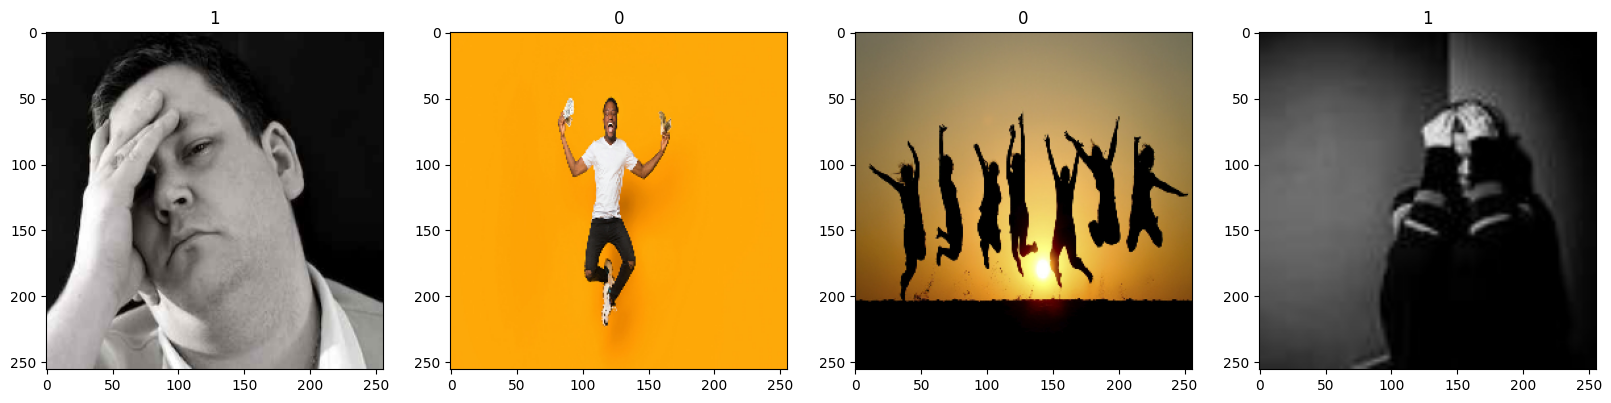

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          ...,
          [0.44804305, 0.27026272, 0.15425092],
          [0.49019608, 0.29607844, 0.1627451 ],
          [0.53464305, 0.32679993, 0.16601562]],
 
         [[0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          ...,
          [0.4284352 , 0.26176855, 0.1539254 ],
          [0.48824295, 0.29412532, 0.16079198],
          [0.527451  , 0.31960785, 0.15882353]],
 
         [[0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          ...,
          [0.40066636, 0.24901961, 0.14705883],
          [0.47517616, 0.28105852, 0.14772518],
          [0.5235294 , 0.3156863 , 0.15490197]],
 
         ...,
 
         [[0.28427544, 0.2764323 , 0.29604015],
          [0.27613

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 29s 3s/step - loss: 0.8458 - accuracy: 0.5312 - val_loss: 0.6957 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 28s 4s/step - loss: 0.6727 - accuracy: 0.6205 - val_loss: 0.6297 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 0.6193 - accuracy: 0.6741 - val_loss: 0.5356 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 21s 2s/step - loss: 0.5081 - accuracy: 0.7768 - val_loss: 0.4641 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.3722 - accuracy: 0.8527 - val_loss: 0.2909 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 26s 3s/step - loss: 0.2653 - accuracy: 0.9241 - val_loss: 0.2189 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.1198 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

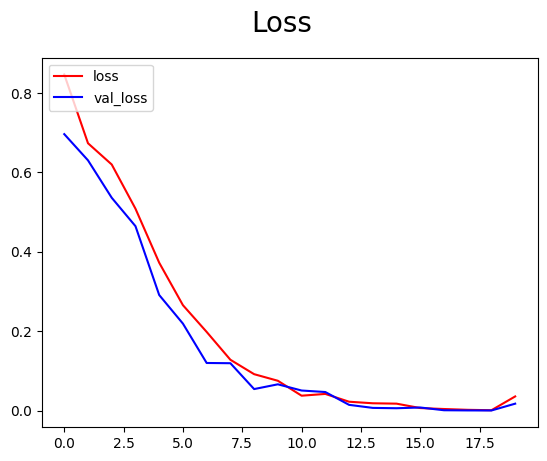

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

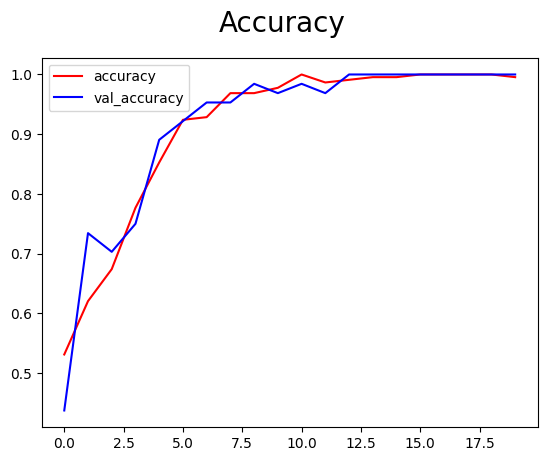

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy




In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [47]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 338ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [50]:
import cv2

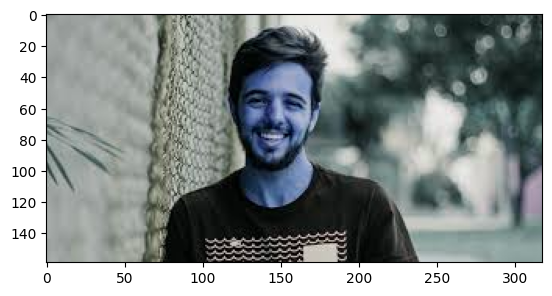

In [61]:
img = cv2.imread('/content/happy.jpg')
plt.imshow(img)
plt.show()

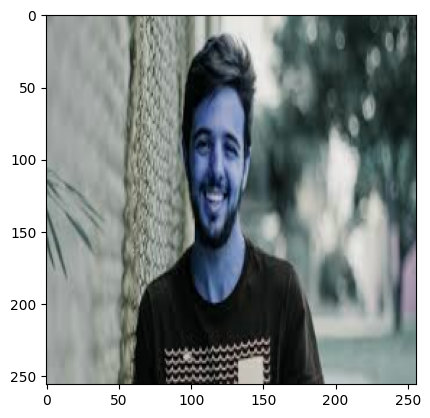

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [64]:
yhat

array([[0.00127099]], dtype=float32)

In [65]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


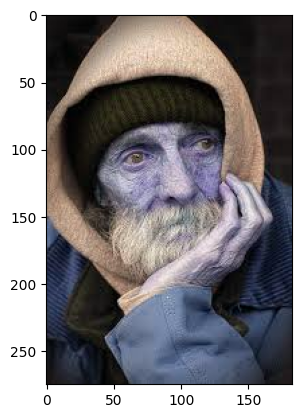

In [56]:
img = cv2.imread('/content/sadtest.jpg')
plt.imshow(img)
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [58]:
yhat

array([[0.7144288]], dtype=float32)

In [60]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [88]:
from tensorflow.keras.models import load_model

In [92]:
model.save(os.path.join('models','Happy_or_Sad.h5'))

In [95]:
new_model = load_model('/content/models/Happy_or_Sad.h5')

In [97]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


array([[0.9276094]], dtype=float32)